
# Project: Investigate a Dataset - [TMDB-MOVIE-DATA-Tugba]

## Table of Contents

#### 1. Introduction
#### 2. Dataset Description
#### 3. Questions for Analaysis
#### 4. Data Wrangling
#### 5. Data Cleaning And Wranglig
#### 6. Exploratory Data Analysis
#### 7. Conclusions


## Introduction

#### I aim to make the statements written under each column in the data set legible and meaningful by running the necessary codes. I will ask some questions to draw conclusions from the data. For this, firstly i will use data wrangling. Then I'm moving with data cleaning in order to see more understandable data. I asked and answer two questions related with each others to explore the data and make conclusions about resulted table and chart. 

### Dataset Description 

> ** tmdb_5000_movies.csv data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.

> ** The columns in the table are as follows in order;
##### 1- budget: Budget used for the movie
##### 2- genres: Genre of the movie
##### 3- homepage: The website where the movie is shown
##### 4- id: Code for the movie
##### 5- keywords: Keywords to have a preliminary idea about the movie
##### 6- original_language: In which language the movie is playing
##### 7- original_title: Actual title of the movie
##### 8- overview: General information about the movie
##### 9- popularity:
##### 10- production_companies: Film production company
##### 11- production_countries: Which countries produced the movie 
##### 12- release_date: Movie release date
##### 13- revenue: Income from the movie
##### 14- runtime: Length of the movie 
##### 15- spoken_languages: Languages spoken in the movie
##### 16- status: Publication status
##### 17- tagline: Tagline of the movie
##### 18- title: Title.
##### 19- vote_average: Vote average 
##### 20- vote_count

> ** tmdb_5000_credits.csv data set contains these tables:
##### 1- movie_id
##### 2- title
##### 3- cast: Actors names
##### 4- crew

> ** As you can see both of these two datasets includes unique title. So we can combine two data through this column. 

### Question(s) for Analysis

> #### Questions:
> 1. What is the relation between revenue and vote rates?
> 2. How often genres are preferred in movies? (I prefered to analyze the top 20 movies by revenue)


In [18]:
import pandas as pd
df_1 = pd.read_csv('tmdb_5000_movies.csv')
df_2 = pd.read_csv('tmdb_5000_credits.csv')
df = pd.merge(df_1, df_2, on='title')
df_1.head(3) # to see the original merged dataset's look.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


## Data Wrangling

> As seen above, title and original_title columns and id and movie_id columns mean the same thing. Therefore I will remove the movie_id and title columns. So the first effect, memory usage of the data will decrease from 901.7+ KB to 826.5+ KB.


In [19]:
import pandas as pd
df_1 = pd.read_csv('tmdb_5000_movies.csv')
df_2 = pd.read_csv('tmdb_5000_credits.csv')
df = pd.merge(df_1, df_2, on='title')

# checked the informations about DataFrame
df.info()
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

(4809, 23)


### Data Cleaning  And Wranglig

In [20]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

df = pd.merge(df_1, df_2, on='title')

df.drop(columns=['movie_id'], inplace=True)
df.drop(columns=['title'], inplace = True)

df.dropna(inplace=True) # used this to clear na values in this DataFrame. 
df.isnull().sum().any() #used this for checking missing values in this DataFrame.

# DataFrame's first line is numbered 0. I changed the numbering to make it sensible.
df.index = df.index +1 

# shortened the long link in the homepage column and convert the datatype as string from object.
df['homepage'] = df['homepage'].astype(str).apply(lambda x: x[:7] + '****' if isinstance(x, str) else x)

# search min and max in id column
min_id = df['id'].min()
max_id = df['id'].max()
print(f'Min ID: {min_id}, Max ID: {max_id}')

# I converted the id data of type int64 to int32 to minimize data memory.
df['id'] = df['id'].astype('int32')

# converted the genres type from object to string.
df['genres'] = df['genres'].astype(str)

# search min and max in budget column
min_budget = df['budget'].min()
max_budget = df['budget'].max()
print(f'Min Budget: {min_budget} , Max Budget: {max_budget}')

# converted the numbers in the budget column to currency.
df['budget'] = df['budget'].apply(lambda x: f"${x:,.0f}")

#chenged also the "revenue" column from numbers to currency
df['revenue'] = df['revenue'].apply(lambda x: f"${x:,.0f}")

# To make it easier to read the data under the genres column, 
# I parsed the JSON data in the genres column and concatenated the name fields.
# I did the same with the other columns that seemed difficult to read.
# (Which ones: keywords, production_companies, production_countries, spoken_languages, cast and crew.)
def parse_genres(genres_str):
    genres_list = ast.literal_eval(genres_str)
    return ", ".join([genre['name'] for genre in genres_list])

df['genres'] = df['genres'].apply(parse_genres)


def parse_keywords(keywords_str):
    keywords_list = ast.literal_eval(keywords_str)
    return ",".join([keywords['name'] for keywords in keywords_list])

df['keywords'] = df['keywords'].apply(parse_keywords)

def parse_production_companies(production_companies_str):
    production_companies_list = ast.literal_eval(production_companies_str)
    return ",".join([production_companies['name'] for production_companies in production_companies_list])

df['production_companies'] = df['production_companies'].apply(parse_production_companies)

def parse_production_countries(production_countries_str):
    production_countries_list = ast.literal_eval(production_countries_str)
    return ",".join([production_countries['name'] for production_countries in production_countries_list])

df['production_countries'] = df['production_countries'].apply(parse_production_countries)

def spoken_languages(spoken_languages_str):
    spoken_languages_list = ast.literal_eval(spoken_languages_str)
    return ",".join([spoken_languages['name'] for spoken_languages in spoken_languages_list])

df['spoken_languages'] = df['spoken_languages'].apply(spoken_languages)

def parse_cast(cast_str):
    cast_list = ast.literal_eval(cast_str)
    return ",".join([cast['name'] for cast in cast_list])

df['cast'] = df['cast'].apply(parse_cast)

def parse_crew(crew_str):
    crew_list = ast.literal_eval(crew_str)
    return ",".join([crew['name'] for crew in crew_list])

df['crew'] = df['crew'].apply(parse_crew)

# I converted the runtime given in minutes to hours + minutes.
def convert_to_hours_minutes(minutes):
    hours = minutes // 60
    minutes %= 60
    return f"{hours} hr {minutes} mn"
df['runtime'] = df['runtime'].apply(convert_to_hours_minutes)

# I set the id number equal to 6 digits to align it (max id number was 6 digits). 
df['id'] = df['id'].astype(str).str.zfill(6)

# Changed the "title" columns name with "Movie_name"
df = df.rename(columns={'original_title': 'Movie_name'})

# Wrote these to open hidden columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# checked the data types look the way we edited them.
df.head(2)

Min ID: 11, Max ID: 426469
Min Budget: 0 , Max Budget: 380000000


,budget,genres,homepage,id,keywords,original_language,Movie_name,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
1,"$237,000,000","Action, Adventure, Fantasy, Science Fiction",http://****,019995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,"$2,787,965,087",2.0 hr 42.0 mn,"English,Español",Released,Enter the World of Pandora.,7.2,11800,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","Stephen E. Rivkin,Rick Carter,Christopher Boye..."
2,"$300,000,000","Adventure, Fantasy, Action",http://****,000285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,"$961,000,000",2.0 hr 49.0 mn,English,Released,"At the end of the world, the adventure begins.",6.9,4500,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","Dariusz Wolski,Gore Verbinski,Jerry Bruckheime..."


## Exploratory Data Analysis

> I asked two questions for exploratory this data. This two questions are connected to each other. First one is about to find a connection between vote rates and revenues from the movies and second, I asked what is the most popular genre among the top 20 highest-grossing movies asked. We can see from the scatterplot that revenues are similar and mostly lower than 1 million dollars but we can see higher votes can cause more revenue for movies. We can also say that movies that receive high ratings will increase in popularity and the number of views will also increase, so we can say that higher revenues are generated.

> From second graph we see a bar chart that shown top 20 most preffered genres of all movies. The most popular one is drama, secondly comedy and thriller following these two categories. TV movies, foreign and western genres are the least popular ones.

 
### What is the relation between revenue and vote rates?

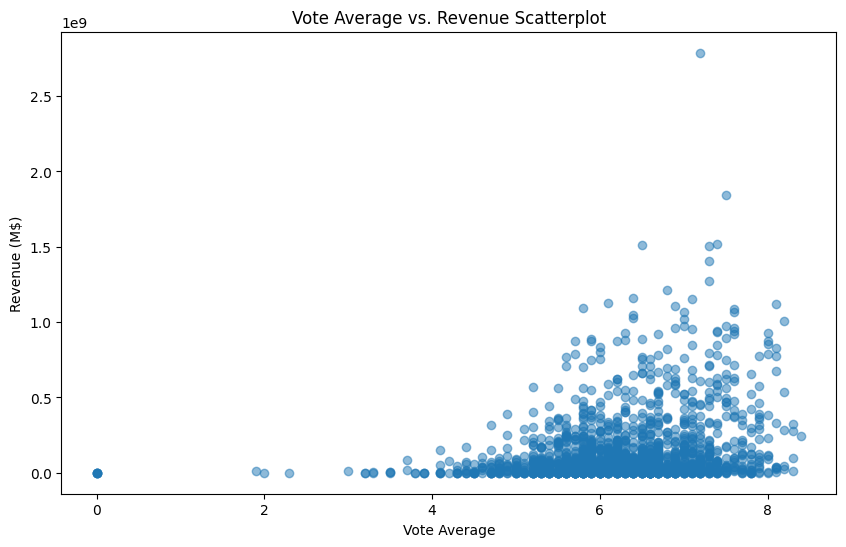

In [24]:
import matplotlib.pyplot as plt

# The "revenue" column is still in string format, we need to convert it to numeric format
df['revenue'] = df['revenue'].replace('[\$,]', '', regex=True).astype(float)

# Creating a Scatterplot 
plt.figure(figsize=(10, 6))
plt.scatter(df['vote_average'], df['revenue'], alpha=0.5)

# Naming axes.
plt.xlabel('Vote Average')
plt.ylabel('Revenue (M$)')
plt.title('Vote Average vs. Revenue Scatterplot')
plt.show()

### How often genres are preferred in movies? (I prefered to analyze the top 20 movies by revenue)

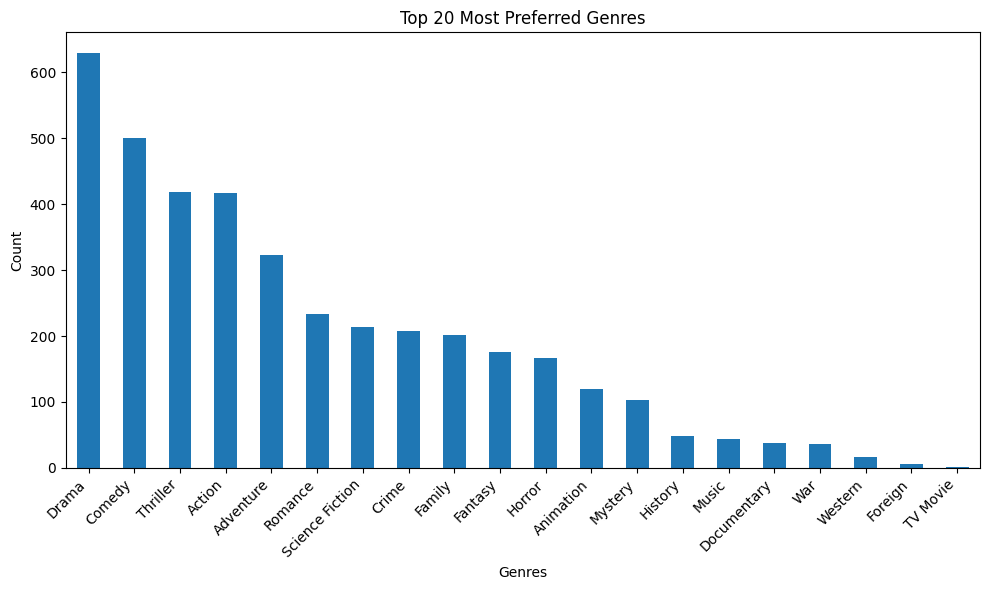

In [10]:
# There was multiple data in one cell under the genres column. So I separated the data in this column.
all_genres = df['genres'].str.split(', ').explode()

# Found the number of each genres.
genre_counts = all_genres.value_counts()

# Choosed the top 20 most preferred types
top_20_genres = genre_counts.head(20)

# Then created a bar chart. I used matplotlib for this. I know we didn't learn matplotlib yet 
# but I could not create a bar chart using course notes.
plt.figure(figsize=(10, 6))
top_20_genres.plot(kind='bar')
plt.title('Top 20 Most Preferred Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # rotate the text on the x-axis and align it to the right
plt.tight_layout()  # to show the graph more clear.
plt.show()


## Conclusions

#### Limitations:
> 1. Since drama is the most preferred genre, it could also be said that drama is the most revenue generating genre in the movie industry. But when we want to create a scatterplot from the dataset that is meaningful and from which we can draw a complete and accurate conclusion, we cannot find two numerical types of columns that are directly related to each other.
> 2. The dataset, movie genres can be found according to keywords, but a question like, for example, what is the most used keyword for the drama genre or what is the most used keyword for the comedy genre may not always lead us to the right conclusion. If I wanted to do a more detailed study, for example, I would want to find data on how much revenue the drama genre generates in which countries.

> If we need to summarize what we have done so far, first I talked about the goals by making an introduction to the project, then I opened the data sets, then I asked two questions I was curious about to perform the analysis. Then I combined the data sets on a common column and made adjustments to some data types and the way they are expressed. I drew a scatterplot, a 2-dimensional graph, to find answers to the questions I asked and answered my other question with a barchart. I mentioned two issues that limited me while analyzing the data and explained how I would follow if I were to continue in future studies. 


#### Some other findings:
>* The highest grossing movie is Hitman with 99965753 dollars The movie was released in 2007 and contains action, crime and drama genres. The 2nd highest grossing movie is Hellboy with 99318987 dollars The movie was released in 2004 and is in the genres fantasy, action, science fiction. The 3rd highest grossing movie is The Visit with 98450062 dollars It's a horror and thriller movie. Among the top 20 highest-grossing movies, drama is the most common genre. It is followed by comedy and then thriller. It can be said that drama is the movie genre that audiences prefer to watch the most, or that most of the movies in the industry are dramas.

>* By looking at this data, we can also tell the production company and production country of the highest grossing films and find out what the most successful production companies are.

>* Since the movies that generate the most revenue are the most watched, it is also possible to get an idea of who the most popular actors are by looking at the cast of the movies.


In [11]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 389252 bytes to Investigate_a_Dataset.html


In [12]:
# Save the modified DataFrame to a new CSV file
df.to_csv('movies_tugba', index=False)